<a href="https://colab.research.google.com/github/Wolf123987/housing-price-prediction-/blob/main/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [ ]:
from google.colab import files

In [ ]:
uploaded= files.upload()

Saving house.xlsx to house (2).xlsx


In [ ]:
df1=pd.read_excel("house (2).xlsx")

In [ ]:
paru=df1

In [ ]:
paru.head()

,Area,Price,Bedroom,address
0,2.0,12,1,NaN
1,3.0,15,2,"#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk..."
2,5.5,20,3,"1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,F..."
3,7.0,25,4,"2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,FALSE"
4,11.5,40,5,"3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,..."


In [ ]:
paru.describe()

,Area,Price,Bedroom
count,17.000000,17.000000,17.000000
mean,23.941176,121.294118,8.588235
std,16.333327,98.737509,5.136375
min,2.000000,12.000000,1.000000
25%,11.500000,40.000000,5.000000
50%,22.000000,95.000000,8.000000
75%,38.000000,200.000000,12.000000
max,50.000000,300.000000,18.000000


In [ ]:
paru.isnull().sum()

Area       0
Price      0
Bedroom    0
address    1
dtype: int64

In [ ]:
paru.dropna()

,Area,Price,Bedroom,address
1,3.0,15,2,"#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk..."
2,5.5,20,3,"1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,F..."
3,7.0,25,4,"2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,FALSE"
4,11.5,40,5,"3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,..."
5,13.0,45,5,"3,VenusaurMega Venusaur,Grass,Poison,80,100,12..."
6,15.0,55,6,"4,Charmander,Fire,,39,52,43,60,50,65,1,FALSE"
7,18.0,75,7,"5,Charmeleon,Fire,,58,64,58,80,65,80,1,FALSE"
8,22.0,95,8,"6,Charizard,Fire,Flying,78,84,78,109,85,100,1,..."
9,25.0,120,9,"6,CharizardMega Charizard X,Fire,Dragon,78,130..."
10,30.0,140,10,"6,CharizardMega Charizard Y,Fire,Flying,78,104..."


In [ ]:
paru.drop_duplicates(inplace = True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


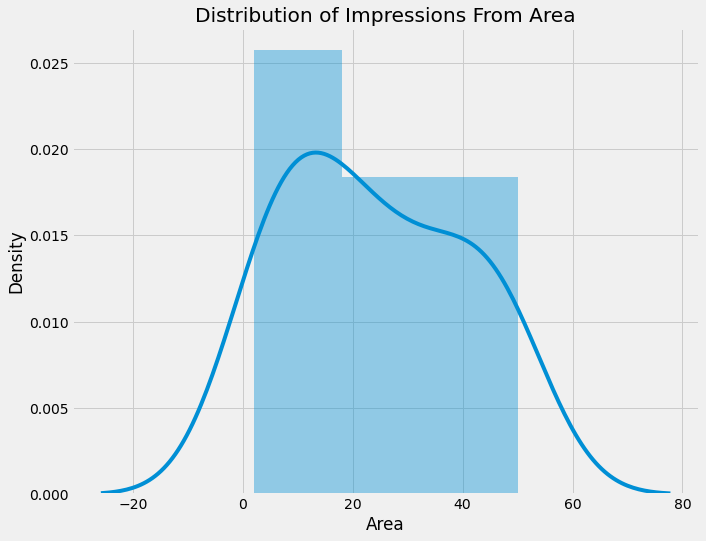

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Area")
sns.distplot(paru['Area'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


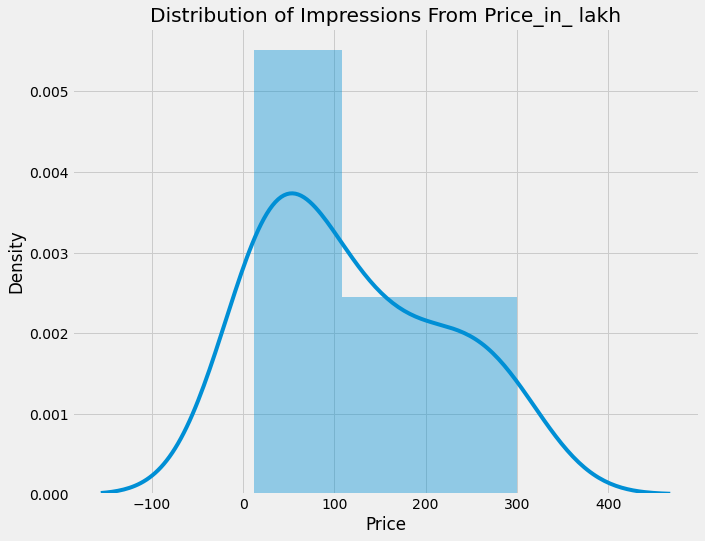

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Price_in_ lakh")
sns.distplot(paru['Price'])
plt.show()

In [ ]:
correlation = paru.corr()
print(correlation["Area"].sort_values(ascending=False))

Area       1.000000
Bedroom    0.994996
Price      0.990850
Name: Area, dtype: float64


In [ ]:
predict = "Price"
data = paru[[ "Price","Area","Bedroom"]]
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [ ]:
X = paru[["Area","Bedroom"]]

y = paru['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None) 

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [ ]:
print (linreg.intercept_)
print (linreg.coef_)

-26.004535552081975
[4.28493975 5.34103721]


In [ ]:
Price = linreg.intercept_+4.28493975*55+5.34103721*20

In [ ]:
print("the Price is ",Price, "lakh for a area of 55 sqr mtr and 20 Bedrooms")

the Price is  316.487894897918 lakh for a area of 55 sqr mtr and 20 Bedrooms


The model pridict that for a  Area = 55 sqr mtr and number of bedroom =20  the price will be of 328.97 lakh

In [ ]:
Price = linreg.intercept_+4.28493975*50+5.34103721*18

In [ ]:
print("the Price is ",Price1, "lakh for a area of 50 sqr mtr and 18 Bedrooms")

the Price is  293.0137 lakh for a area of 50 sqr mtr and 18 Bedrooms


In [ ]:
model_efficiency = ((Price1/300)*100)

In [ ]:
print(model_efficiency)

97.67123333333333


the model pridict that for a area of 50 sqr mtr and 18 Bedrroms the price is293.0137 lakh and as per data the price should be 300 lakh for same parameter so model efficiency is 97.671 %